# Decision Tree

Árvores, de um modo geral em computação, são estruturas de dados formadas por um conjunto de elementos que armazenam informações chamadas nós. Além disso, toda árvore possui um nó chamado raiz, que possui o maior nível hierárquico (o ponto de partida) e ligações para outros elementos, denominados filhos. Esses filhos podem possuir seus próprios filhos que por sua vez também possuem os seus. O nó que não possui filho é conhecido como nó folha ou terminal.

Tratando os dados e preparando o _dataset_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'classification']
df = pd.read_csv('../data/nursery.data.csv', header=None, names=columns)

In [3]:
X = pd.get_dummies(df.drop('classification', axis=1))

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['classification'])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree Classifier

Importando o modelo da Árvore de Decisão

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtree = DecisionTreeClassifier()

In [8]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
pred = dtree.predict(X_test)

In [10]:
dtree.score(X_test, y_test)

0.9943415637860082

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1320
          1       0.99      1.00      0.99      1272
          2       0.00      0.00      0.00         2
          3       1.00      0.99      0.99      1190
          4       0.96      1.00      0.98       104

avg / total       0.99      0.99      0.99      3888



/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
print(confusion_matrix(y_test, pred))

[[1320    0    0    0    0]
 [   0 1266    0    4    2]
 [   0    0    0    0    2]
 [   0   14    0 1176    0]
 [   0    0    0    0  104]]


In [14]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [15]:
features = list(X.columns.values)
features

['parents_great_pret',
 'parents_pretentious',
 'parents_usual',
 'has_nurs_critical',
 'has_nurs_improper',
 'has_nurs_less_proper',
 'has_nurs_proper',
 'has_nurs_very_crit',
 'form_complete',
 'form_completed',
 'form_foster',
 'form_incomplete',
 'children_1',
 'children_2',
 'children_3',
 'children_more',
 'housing_convenient',
 'housing_critical',
 'housing_less_conv',
 'finance_convenient',
 'finance_inconv',
 'social_nonprob',
 'social_problematic',
 'social_slightly_prob',
 'health_not_recom',
 'health_priority',
 'health_recommended']

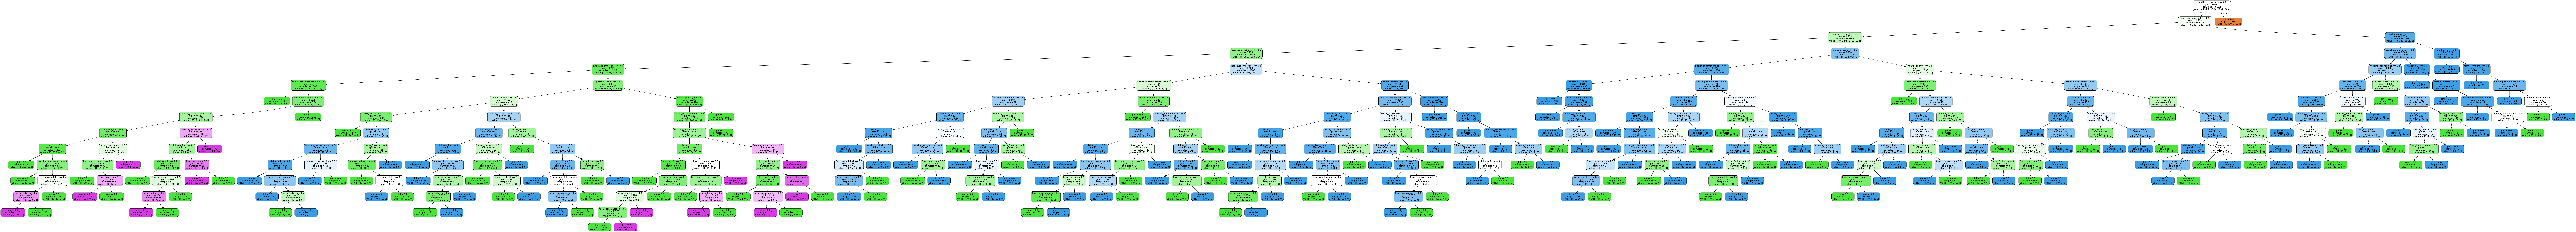

In [16]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png(), embed=True)

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier(n_estimators=400)

In [32]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rfc_pred = rfc.predict(X_test)

In [36]:
rfc.score(X_test, y_test)

0.9886831275720165

In [37]:
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1320
          1       0.99      0.98      0.98      1272
          2       0.00      0.00      0.00         2
          3       0.98      0.99      0.99      1190
          4       0.98      0.88      0.93       104

avg / total       0.99      0.99      0.99      3888



/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
